<a href="https://colab.research.google.com/github/mwwi/exp1.2/blob/main/exp1_2_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix Size | Add Serial (s) | Add Parallel (s) | Subtract Serial (s) | Subtract Parallel (s) | Multiply Serial (s) | Multiply Parallel (s)
-----------------------------------------------------------------------------------------------
15           | 0.000021        | 0.139661          | 0.000006             | 0.116870               | 0.000051            | 0.145440              
500          | 0.002144        | 0.187579          | 0.000569             | 0.257479               | 0.022210            | 0.380279              
2500         | 0.045789        | 1.373222          | 0.049762             | 1.709901               | 2.949478            | 22.610374             
5000         | 0.138200        | 4.018679          | 0.095267             | 3.737395               | 13.377030           | 104.460213            
10000        | 0.377268        | 10.457175         | 0.326461             | 9.817440               | 68.262739           | 784.599370            


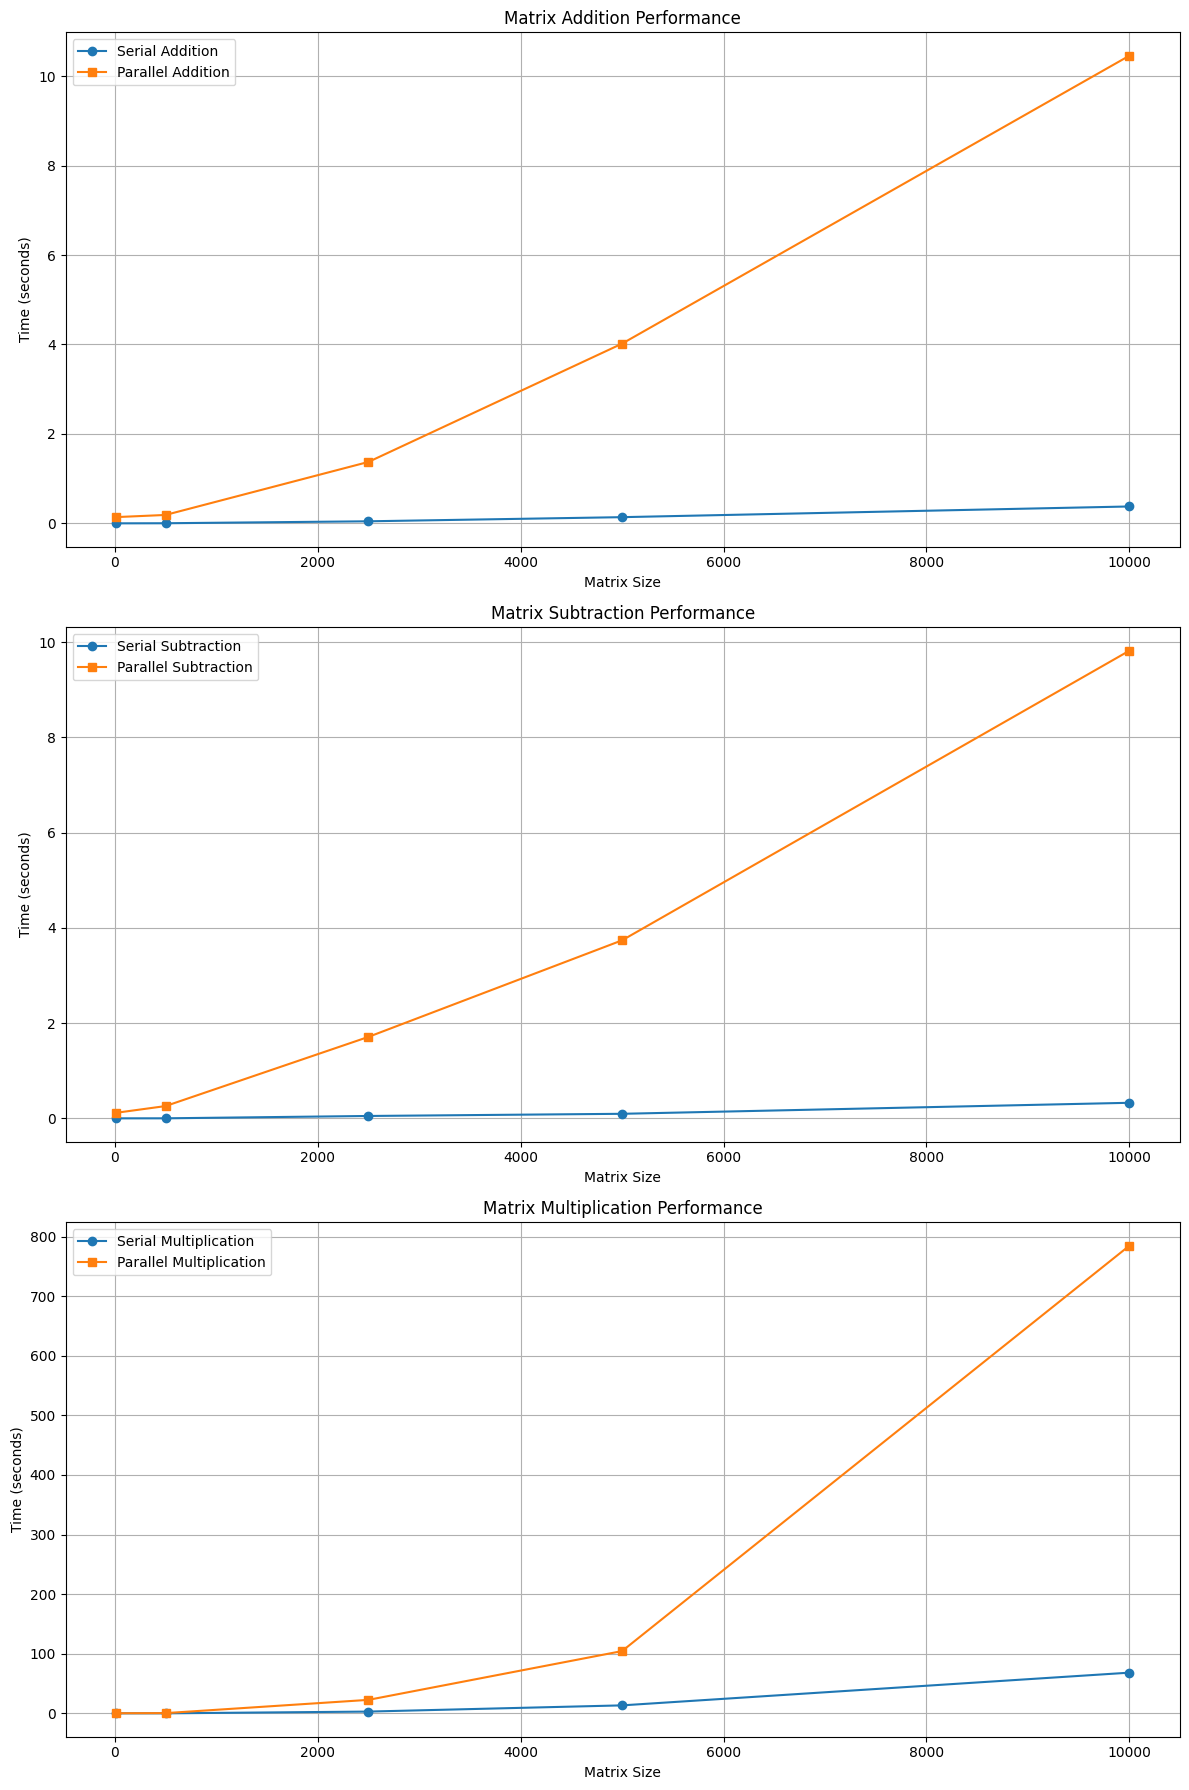

In [ ]:
# Original

import numpy as np
import time
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt

# Define matrix operations (serial)
def matrix_add_serial(A, B):
    """Adds two matrices A and B serially."""
    return A + B

def matrix_subtract_serial(A, B):
    """Subtracts matrix B from matrix A serially."""
    return A - B

def matrix_multiply_serial(A, B):
    """Multiplies two matrices A and B serially."""
    return A @ B

# Define matrix operations (parallel)
def matrix_add_parallel(A, B):
    """Adds two matrices A and B in parallel using multiprocessing."""
    with Pool(cpu_count()) as p:
        return np.array(p.starmap(np.add, zip(A, B)))

def matrix_subtract_parallel(A, B):
    """Subtracts matrix B from matrix A in parallel using multiprocessing."""
    with Pool(cpu_count()) as p:
        return np.array(p.starmap(np.subtract, zip(A, B)))

def matrix_multiply_parallel(A, B):
    """Multiplies two matrices A and B in parallel using multiprocessing."""
    with Pool(cpu_count()) as p:
        return np.array(p.starmap(np.dot, [(A[i], B) for i in range(A.shape[0])]))

# Measure execution time
def measure_time(func, *args):
    """Measures the execution time of a function."""
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Matrix sizes to test
matrix_sizes = [15, 50, 100, 500, 1000]
results = []

for size in matrix_sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # Serial times
    add_serial_time = measure_time(matrix_add_serial, A, B)
    sub_serial_time = measure_time(matrix_subtract_serial, A, B)
    mul_serial_time = measure_time(matrix_multiply_serial, A, B)

    # Parallel times
    add_parallel_time = measure_time(matrix_add_parallel, A, B)
    sub_parallel_time = measure_time(matrix_subtract_parallel, A, B)
    mul_parallel_time = measure_time(matrix_multiply_parallel, A, B)

    # Store results
    results.append([size, add_serial_time, add_parallel_time, sub_serial_time, sub_parallel_time, mul_serial_time, mul_parallel_time])

# Print results in a formatted table
print("Matrix Size | Add Serial (s) | Add Parallel (s) | Subtract Serial (s) | Subtract Parallel (s) | Multiply Serial (s) | Multiply Parallel (s)")
print("-----------------------------------------------------------------------------------------------")
for result in results:
    print(f"{result[0]:<12} | {result[1]:<15.6f} | {result[2]:<17.6f} | {result[3]:<20.6f} | {result[4]:<22.6f} | {result[5]:<19.6f} | {result[6]:<22.6f}")

# Plot performance
def plot_performance(matrix_sizes, results):
    """Plots the performance of serial and parallel matrix operations."""
    add_serial = [r[1] for r in results]
    add_parallel = [r[2] for r in results]
    sub_serial = [r[3] for r in results]
    sub_parallel = [r[4] for r in results]
    mul_serial = [r[5] for r in results]
    mul_parallel = [r[6] for r in results]

    plt.figure(figsize=(12, 18))

    # Addition
    plt.subplot(3, 1, 1)
    plt.plot(matrix_sizes, add_serial, 'o-', label='Serial Addition')
    plt.plot(matrix_sizes, add_parallel, 's-', label='Parallel Addition')
    plt.xlabel('Matrix Size')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Addition Performance')
    plt.legend()
    plt.grid(True)

    # Subtraction
    plt.subplot(3, 1, 2)
    plt.plot(matrix_sizes, sub_serial, 'o-', label='Serial Subtraction')
    plt.plot(matrix_sizes, sub_parallel, 's-', label='Parallel Subtraction')
    plt.xlabel('Matrix Size')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Subtraction Performance')
    plt.legend()
    plt.grid(True)

    # Multiplication
    plt.subplot(3, 1, 3)
    plt.plot(matrix_sizes, mul_serial, 'o-', label='Serial Multiplication')
    plt.plot(matrix_sizes, mul_parallel, 's-', label='Parallel Multiplication')
    plt.xlabel('Matrix Size')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Multiplication Performance')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the performance
plot_performance(matrix_sizes, results)

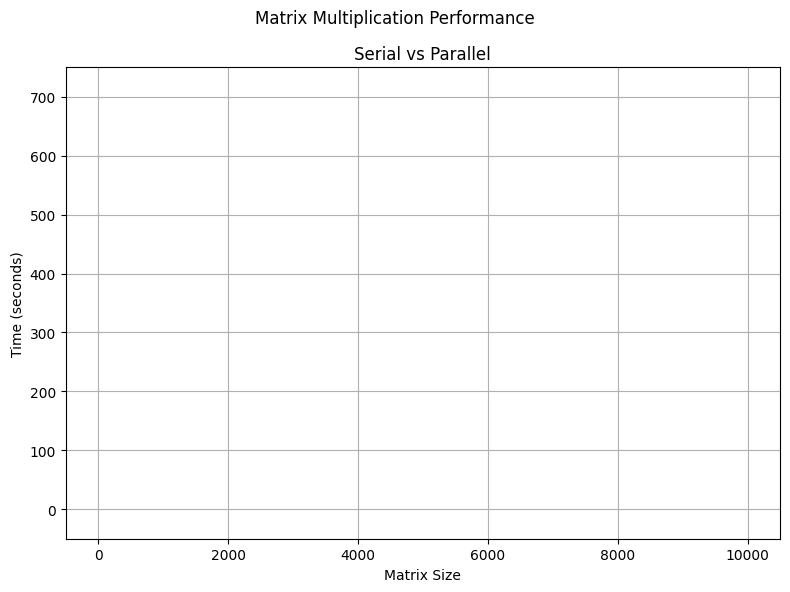

In [ ]:
# empty multiplication graph

import matplotlib.pyplot as plt

def empty_plot():
    """Generates an empty graph with margins on both axes for plotting data close to zero."""
    plt.figure(figsize=(8, 6))

    # Titles and labels
    plt.suptitle('Matrix Multiplication Performance')
    plt.title('Serial vs Parallel')
    plt.xlabel('Matrix Size')
    plt.ylabel('Time (seconds)')

    # Adjust ticks for x and y axes
    plt.xticks([0, 2000, 4000, 6000, 8000, 10000])
    plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])

    # Adding margins to both axes
    plt.xlim(-500, 10500)  # X-axis margin before 0 and after 10000
    plt.ylim(-50, 750)     # Y-axis margin to match the y-ticks from 0 to 700

    # Show grid
    plt.grid(True)

    # Display the empty plot
    plt.tight_layout()
    plt.show()

# Generate the empty plot
empty_plot()
